In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
logs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [77]:
logs_data.platform.unique().tolist()

['phone', 'computer', 'tablet']

In [78]:
', '.join([str(client) for client in logs_data.platform.unique().tolist()])

'phone, computer, tablet'

In [9]:
success_users = logs_data.query('success == True') \
                            .groupby('client', as_index=False) \
                            .agg({'platform': 'count'}) \
                            .sort_values('platform',ascending=False) \
                            .rename(columns = {'platform': 'success_client'})
                            

In [10]:
success_client = success_users.query('success_client == 41') \
                .sort_values('client') \
                .client \
                .tolist()

In [11]:
', '.join([str(client) for client in success_client])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [12]:
logs_data.query('success == True') \
.groupby('platform') \
.agg({'success': 'count'}) \
.sort_values('success', ascending = False)

,success
platform,
phone,2019
computer,1090
tablet,180


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

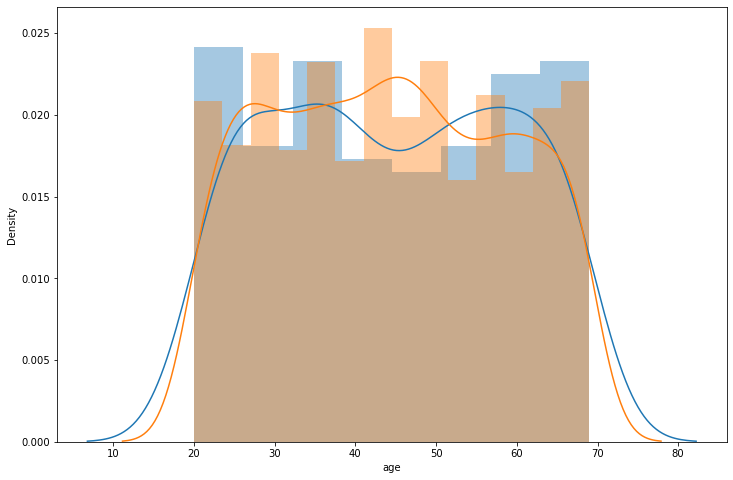

In [70]:
plt.figure(figsize=(12, 8))
sns.distplot(user_data.query('premium == True').age)
sns.distplot(user_data.query('premium == False').age)


In [41]:
visusalize_success = logs_data.groupby('client') \
                                .agg({'success' : 'sum'})

<AxesSubplot:xlabel='success', ylabel='Count'>

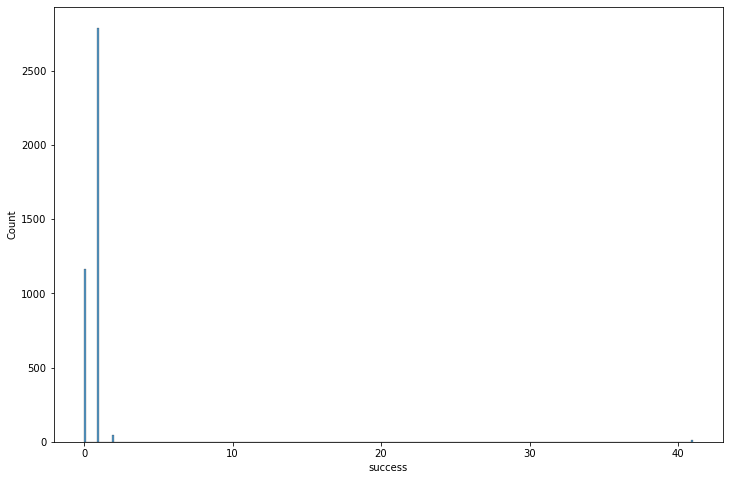

In [72]:
plt.figure(figsize=(12, 8))
sns.histplot(visusalize_success.success)

In [44]:
visusalize_success.value_counts()

success
1          2791
0          1166
2            43
41            9
3             1
40            1
dtype: int64

In [45]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [46]:
logs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [47]:
resalt_data = user_data.merge(logs_data)

In [69]:
computer_success_age = resalt_data.query('platform == "computer"') \
            .groupby('age', as_index=False) \
            .agg({'success': 'sum'})

<AxesSubplot:xlabel='age', ylabel='success'>

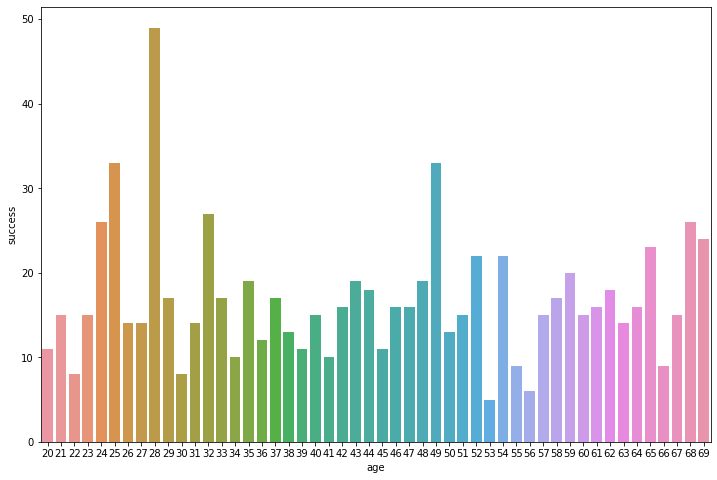

In [68]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='success', data = computer_success_age)


In [73]:
resalt_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [76]:
resalt_data.groupby('platform', as_index=False)\
.agg({'premium': 'sum'})\
.sort_values('premium', ascending=False)

,platform,premium
1,phone,246
0,computer,150
2,tablet,24
